In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['Real estate.csv']))

In [ ]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.rename(columns = {'X1 transaction date':'Transaction_date', 'X2 house age':'House_age',
                              'X3 distance to the nearest MRT station':'Distance_to_the_nearest_MRT_station',
                      'X4 number of convenience stores':'number_of_convenience_stores','X5 latitude':'latitude',
                      'X6 longitude':'longitude','Y house price of unit area':'price'}, inplace = True)

In [ ]:
# from sklearn.model_selection import train_test_split
# training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
# X_train = training_set[[ 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','Transaction_date','longitude']]
# Y_train = training_set['price']
# X_test = test_set[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','Transaction_date','longitude']]
# Y_test = test_set['price']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# print(scaler.fit(data))
# print(scaler.mean_)
# print(scaler.transform(data))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# ms = MinMaxScaler()

# X = ms.fit_transform(X)

In [ ]:
X= df
# y= df['price']

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)
# kmeans.fit(X_test)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df['labels'] = kmeans.labels_

# # check how many of the samples were correctly labeled
# correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

In [ ]:
df['labels'].unique()

array([0, 2, 1], dtype=int32)

In [ ]:
# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

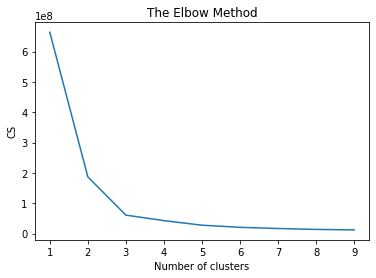

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [ ]:
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 955.9130707020233
2 : 521.532245267306
3 : 292.6906702177303
4 : 247.36721245920666
5 : 224.46830286086362
6 : 193.88259680203947
7 : 180.38902667002523
8 : 163.38594952128474
9 : 148.90873615676006


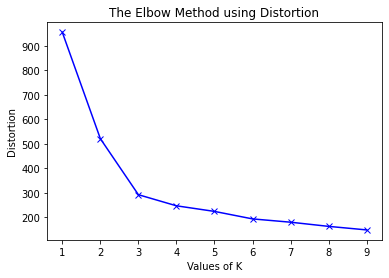

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [ ]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=9,random_state=0)

# kmeans.fit(X)

# labels = kmeans.labels_

# # check how many of the samples were correctly labeled

# correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
X=df
df.head(5)

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
# X = pd.DataFrame(ct.fit_transform(X))

In [ ]:
X.tail(5)

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,0
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,0
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9,0


In [ ]:
one_hot_encoded_data = pd.get_dummies(X, columns = ['labels'])
one_hot_encoded_data.replace({"NA": np.nan},inplace=True)
print(one_hot_encoded_data)

      No  Transaction_date  House_age  Distance_to_the_nearest_MRT_station  \
0      1          2012.917       32.0                             84.87882   
1      2          2012.917       19.5                            306.59470   
2      3          2013.583       13.3                            561.98450   
3      4          2013.500       13.3                            561.98450   
4      5          2012.833        5.0                            390.56840   
..   ...               ...        ...                                  ...   
409  410          2013.000       13.7                           4082.01500   
410  411          2012.667        5.6                             90.45606   
411  412          2013.250       18.8                            390.96960   
412  413          2013.000        8.1                            104.81010   
413  414          2013.500        6.5                             90.45606   

     number_of_convenience_stores  latitude  longitude  price  

In [ ]:
one_hot_encoded_data.tail(5)

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels_0,labels_1,labels_2
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,0,1,0
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,1,0,0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,1,0,0
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,1,0,0
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9,1,0,0


In [ ]:
# Import the required libraries.
import os
import cv2
#import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd

#from moviepy.editor import *
#%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
one_hot_encoded_labels = to_categorical(X['labels'])

In [ ]:
print(one_hot_encoded_labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
X=one_hot_encoded_data
X.head(5)

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels_0,labels_1,labels_2
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1,0,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,0,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,0,0


In [ ]:
X_norm = X[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','longitude']]
X_norm.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude
0,84.87882,10,32.0,24.98298,121.54024
1,306.59470,9,19.5,24.98034,121.53951
2,561.98450,5,13.3,24.98746,121.54391
3,561.98450,5,13.3,24.98746,121.54391
4,390.56840,5,5.0,24.97937,121.54245


In [ ]:
X_norm = (X_norm-X_norm.mean())/(X_norm.max()-X_norm.min())
X_norm.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude
0,-0.154534,0.59058,0.326197,0.169049,0.074174
1,-0.120237,0.49058,0.040809,0.137057,0.066303
2,-0.080732,0.09058,-0.100743,0.223339,0.113747
3,-0.080732,0.09058,-0.100743,0.223339,0.113747
4,-0.107248,0.09058,-0.290241,0.125302,0.098004


In [ ]:
# df = df.iloc[:,1:]
# df_norm = (df - df.mean()) / (df.max()-df.min())
# df_norm.head()

In [ ]:
X_norm.corr()

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude
Distance_to_the_nearest_MRT_station,1.000000,-0.602519,0.025622,-0.591067,-0.806317
number_of_convenience_stores,-0.602519,1.000000,0.049593,0.444143,0.449099
House_age,0.025622,0.049593,1.000000,0.054420,-0.048520
latitude,-0.591067,0.444143,0.054420,1.000000,0.412924
longitude,-0.806317,0.449099,-0.048520,0.412924,1.000000


In [ ]:
temp1=X_norm
temp2=X



In [ ]:
temp2=temp2.drop(['No','Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','longitude'], axis = 1)

In [ ]:
temp2.head(5)

,Transaction_date,price,labels_0,labels_1,labels_2
0,2012.917,37.9,1,0,0
1,2012.917,42.2,1,0,0
2,2013.583,47.3,1,0,0
3,2013.500,54.8,1,0,0
4,2012.833,43.1,1,0,0


In [ ]:
res=temp1.join(temp2)

In [ ]:
res.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,labels_0,labels_1,labels_2
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,1,0,0
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,1,0,0
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,1,0,0
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,1,0,0
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,1,0,0


In [ ]:
X=res[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores','House_age','latitude','longitude','labels_0','labels_1','labels_2']]
y= res['price']

In [ ]:
X_arr = X.values
y_arr = y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', y_arr.shape)

X_arr shape:  (414, 8)
Y_arr shape:  (414,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.2, shuffle = True, random_state=7)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (331, 8)
y_train shape:  (331,)
X_test shape:  (83, 8)
y_test shape:  (83,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees
# rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(X_train,y_train);

In [ ]:
# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / test_labels)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
clf= RandomForestRegressor().fit(X_train, y_train)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,Y_pred)
# accuracy = float(cm.diagonal().sum())/len(y_test)
# print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

In [ ]:
clf= RandomForestRegressor().fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

0.9479738368199921

In [ ]:
clf.score(X_test, y_test)

0.5928687252891293

In [ ]:
res['rlabel']=clf.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print("MSE",mean_squared_error(y_test,y_pred))

MSE 46.81530250131545


In [ ]:
res['rlabel'].head(5)

0    40.9810
1    43.0240
2    45.8510
3    45.8510
4    45.9625
Name: rlabel, dtype: float64

In [ ]:
res.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,labels_0,labels_1,labels_2,rlabel
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,1,0,0,40.9810
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,1,0,0,43.0240
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,1,0,0,45.8510
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,1,0,0,45.8510
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,1,0,0,45.9625


In [ ]:
X=res[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores','House_age','latitude','longitude','labels_0','labels_1','labels_2']]
y= res['rlabel']

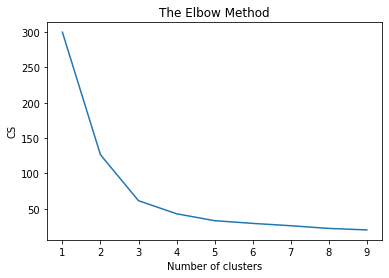

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
res['f_labels'] = kmeans.labels_

In [ ]:
res.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,labels_0,labels_1,labels_2,rlabel,f_labels
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,1,0,0,40.9810,0
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,1,0,0,43.0240,0
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,1,0,0,45.8510,0
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,1,0,0,45.8510,0
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,1,0,0,45.9625,0


In [ ]:
res=res.drop(['labels_0','labels_1','labels_2'], axis=1)

In [ ]:
res.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,rlabel,f_labels
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,40.9810,0
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,43.0240,0
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,45.8510,0
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,45.8510,0
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,45.9625,0


In [ ]:
one_hot_encoded_data = pd.get_dummies(res, columns = ['f_labels'])
one_hot_encoded_data.replace({"NA": np.nan},inplace=True)
print(one_hot_encoded_data)

     Distance_to_the_nearest_MRT_station  number_of_convenience_stores  \
0                              -0.154534                       0.59058   
1                              -0.120237                       0.49058   
2                              -0.080732                       0.09058   
3                              -0.080732                       0.09058   
4                              -0.107248                       0.09058   
..                                   ...                           ...   
409                             0.463774                      -0.40942   
410                            -0.153671                       0.49058   
411                            -0.107186                       0.29058   
412                            -0.151451                       0.09058   
413                            -0.153671                       0.49058   

     House_age  latitude  longitude  Transaction_date  price     rlabel  \
0     0.326197  0.169049   0.074174 

In [ ]:
X=one_hot_encoded_data
X.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,rlabel,f_labels_0,f_labels_1,f_labels_2
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,40.9810,1,0,0
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,43.0240,1,0,0
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,45.8510,1,0,0
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,45.8510,1,0,0
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,45.9625,1,0,0


In [ ]:
res=X

In [ ]:
# def get_model():
    
#     model = Sequential([
#         Dense(5, input_shape = (8,), activation = 'relu'),
#         Dense(12, activation = 'sigmoid'),
#         Dense(6, activation = 'relu'),
#         Dense(1)
#     ])

#     model.compile(
#         loss='mse',
#         optimizer='adadelta'
#     )
    
#     return model

# model = get_model()
# model.summary()

In [ ]:
# model = get_model()

# preds_on_untrained = model.predict(X_test)

In [ ]:
# early_stopping = EarlyStopping(monitor='accuracy', patience = 5)


# history = model.fit(
#     X_train, y_train,
#     validation_data = (X_test, y_test),
#     epochs = 100,
#     callbacks = [early_stopping]
# )

In [ ]:
# X.head(5)

In [ ]:
# df=one_hot_encoded_data
# df.head(5)

In [ ]:
# mean_val=df.mean()
# mean_val

In [ ]:
# std_val=df.std()
# std_val

In [ ]:
# date=2012.500

# date=(date- mean_val[0] )/ std_val[0]

In [ ]:
# age= 23

# age= (age- mean_val[1] )/ std_val[1]

In [ ]:
# mrt= 1200
# mrt= (mrt- mean_val[2] )/ std_val[2]

In [ ]:
# latitude=24.97

# latitude=(latitude- mean_val[4] )/ std_val[4]

In [ ]:

# stores=5

# stores=(stores- mean_val[3] )/ std_val[3]

In [ ]:

# longitude=121.53

# longitude=(longitude- mean_val[5] )/ std_val[5]

In [ ]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
# acc = history.history['mae']
# val_acc = history.history['val_mae']
# plt.plot(epochs, acc, 'y', label='Training MAE')
# plt.plot(epochs, val_acc, 'r', label='Validation MAE')
# plt.title('Training and validation MAE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
# test_input= np.array( [[ date, age, mrt, stores, latitude, longitude]] )

In [ ]:
# val= model.predict(test_input)
# result=val[0][0]

In [ ]:
# print("The predicted price is=",convert_label_value(result))

In [ ]:
# predictions = model.predict(test_input)
# print("Predicted values are: ", predictions)

In [ ]:
# mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
# print('Mean squared error from neural net: ', mse_neural)
# print('Mean absolute error from neural net: ', mae_neural)

In [ ]:
res.head(5)

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,Transaction_date,price,rlabel,f_labels_0,f_labels_1,f_labels_2
0,-0.154534,0.59058,0.326197,0.169049,0.074174,2012.917,37.9,40.9810,1,0,0
1,-0.120237,0.49058,0.040809,0.137057,0.066303,2012.917,42.2,43.0240,1,0,0
2,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.583,47.3,45.8510,1,0,0
3,-0.080732,0.09058,-0.100743,0.223339,0.113747,2013.500,54.8,45.8510,1,0,0
4,-0.107248,0.09058,-0.290241,0.125302,0.098004,2012.833,43.1,45.9625,1,0,0


In [ ]:
X=res[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores','House_age','latitude','f_labels_0','f_labels_1','f_labels_2']]
# X=res[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores','House_age','latitude','longitude','f_labels_0','f_labels_1','f_labels_2']]
# X=res[['f_labels_0','f_labels_1','f_labels_2']]
y= res['price']

In [ ]:
X_arr = X.values
y_arr = y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', y_arr.shape)

X_arr shape:  (414, 7)
Y_arr shape:  (414,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.2, shuffle = True, random_state=7)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (331, 7)
y_train shape:  (331,)
X_test shape:  (83, 7)
y_test shape:  (83,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()

# here change your line to leave out an activation 
# model.add(Dense(90))

# now add a ReLU layer explicitly:
# model.add(LeakyReLU(alpha=0.05))

In [ ]:
# define the model
#Experiment with deeper and wider networks
# model = Sequential()
# model.add(Dense(128, input_dim=6, activation='leakyrelu'))
model.add(Dense(128, input_dim=7))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
# model.compile(loss='mse', optimizer='sgd', metrics=['tf.keras.metrics.Accuracy()'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [ ]:
# def get_model():
    
#     model = Sequential([
#         Dense(5, input_shape = (7,), activation = 'relu'),
#         Dense(12, activation = 'sigmoid'),
#         Dense(6, activation = 'relu'),
#         Dense(1)
#     ])

#     model.compile(
#         loss='mse',
#         optimizer='adadelta'
#     )
    
#     return model

# model = get_model()
# model.summary()

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs =20)

Epoch 1/20
8/8 [==============================] - 1s 44ms/step - loss: 1508.7410 - mae: 35.9220 - val_loss: 1363.9625 - val_mae: 35.0077
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 1244.8375 - mae: 32.0214 - val_loss: 1024.7085 - val_mae: 29.7991
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 870.3067 - mae: 25.6801 - val_loss: 559.6861 - val_mae: 20.9131
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 393.1214 - mae: 16.0246 - val_loss: 144.5542 - val_mae: 9.5212
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 125.4024 - mae: 8.0900 - val_loss: 145.6521 - val_mae: 9.0298
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 128.0555 - mae: 8.3387 - val_loss: 90.0611 - val_mae: 7.0791
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 88.1340 - mae: 6.2145 - val_loss: 75.2357 - val_mae: 6.5650
Epoch 8/20
8/8 [==============================] - 0s 7ms/step - lo

In [ ]:
# history = model.fit(X_train, y_train, validation_split=0.3, epochs =100)

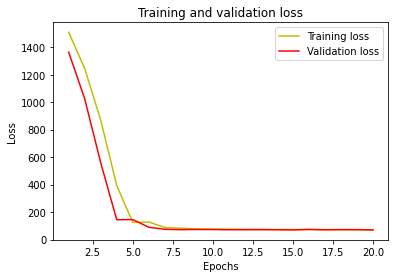

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

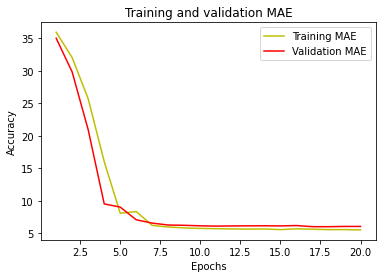

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[58.03124 ]
 [29.962576]
 [57.94772 ]
 [18.549953]
 [26.304989]]
Real values are:  [63.3 28.4 45.4 45.1 27.3]


In [ ]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

3/3 [==============================] - 0s 5ms/step - loss: 38.9678 - mae: 4.5940
Mean squared error from neural net:  38.96780776977539
Mean absolute error from neural net:  4.59401273727417


In [ ]:
X=res[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores','House_age','latitude','f_labels_0','f_labels_1','f_labels_2']]
y= res['price']
y_pred= model.predict(X_test_scaled)

In [ ]:
# model.score(X_test_scaled, y_test)

In [ ]:
# m = tf.keras.metrics.Accuracy()

In [ ]:
# tf.keras.metrics.SparseCategoricalAccuracy(
#     name="sparse_categorical_accuracy", dtype=None
# )

In [ ]:
# acc = np.dot(X_test_scaled, np.equal(y_test, np.argmax(predictions, axis=1))

In [ ]:
# y_pred= model.predict(X_test)

In [ ]:
y_pred= pd.DataFrame(y_pred)
y_pred

,0
0,58.031239
1,29.962576
2,57.947720
3,18.549953
4,26.304989
...,...
78,26.210497
79,47.903881
80,43.251785
81,35.455074


In [ ]:
y_test= pd.DataFrame(y_test)

In [ ]:
errors=abs(y_pred-y_test)

In [ ]:
# y_test= pd.DataFrame(y_test)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
# print(mape)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 0    87.65
dtype: float64 %.


In [ ]:
# from sklearn.metrics import f1_score
# y_pred= model.predict(X_test_scaled)
# f1_score(y_test, y_pred, average='macro')

In [ ]:
y_test.head(5)

,0
0,63.3
1,28.4
2,45.4
3,45.1
4,27.3


In [ ]:
# y_pred= pd.DataFrame(y_pred)

In [ ]:
# y_pred.head(5)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4.594012297205179


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 38.96780904016845


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 6.2424201268553245


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 1.831367948032717


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.6611147868420206


In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

**VISUALIZATION**

In [ ]:
res.corr()

,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,House_age,latitude,longitude,price,rlabel,f_labels_0,f_labels_1,f_labels_2,neural_result,nn_labels_0,nn_labels_1,nn_labels_2
Distance_to_the_nearest_MRT_station,1.000000,-0.602519,0.025622,-0.591067,-0.806317,-0.673613,-0.733231,-0.799927,0.292088,0.844860,-0.870299,-0.272495,-0.434253,0.658138
number_of_convenience_stores,-0.602519,1.000000,0.049593,0.444143,0.449099,0.571005,0.616119,0.604742,-0.365441,-0.436648,0.645495,0.358107,0.512138,-0.807282
House_age,0.025622,0.049593,1.000000,0.054420,-0.048520,-0.210567,-0.229135,0.070907,-0.117480,0.053075,-0.114623,0.756382,-0.515677,-0.132807
latitude,-0.591067,0.444143,0.054420,1.000000,0.412924,0.546307,0.593068,0.529097,-0.219489,-0.522081,0.609911,0.251345,0.288060,-0.496335
longitude,-0.806317,0.449099,-0.048520,0.412924,1.000000,0.523287,0.571536,0.648426,-0.264480,-0.646131,0.699817,0.207186,0.396606,-0.565789
price,-0.673613,0.571005,-0.210567,0.546307,0.523287,1.000000,0.950620,0.675902,-0.446515,-0.434835,0.759151,0.104410,0.515212,-0.595518
rlabel,-0.733231,0.616119,-0.229135,0.593068,0.571536,0.950620,1.000000,0.731209,-0.468220,-0.491138,0.823371,0.124257,0.551468,-0.648008
f_labels_0,-0.799927,0.604742,0.070907,0.529097,0.648426,0.675902,0.731209,1.000000,-0.778064,-0.479252,0.966749,0.332523,0.479005,-0.753009
f_labels_1,0.292088,-0.365441,-0.117480,-0.219489,-0.264480,-0.446515,-0.468220,-0.778064,1.000000,-0.178454,-0.662968,-0.245946,-0.354377,0.557039
f_labels_2,0.844860,-0.436648,0.053075,-0.522081,-0.646131,-0.434835,-0.491138,-0.479252,-0.178454,1.000000,-0.587979,-0.177216,-0.255159,0.401190


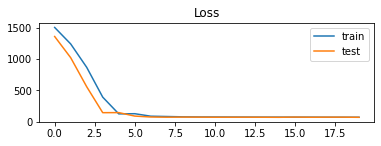

In [ ]:
# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


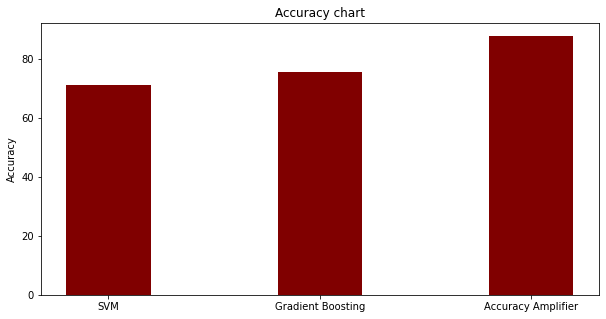

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'SVM':71.08,'Gradient Boosting':75.7,'Accuracy Amplifier':87.89}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

# plt.xlabel("Machine learning models")
plt.ylabel("Accuracy")
plt.title("Accuracy chart")
plt.show()


In [ ]:
# # plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['val_accuracy'], label='test')
# pyplot.legend()
# pyplot.show()

In [ ]:
# import numpy as np
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # X, y = load_iris(return_X_y=True)

# # Add noisy features
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# # Limit to the two first classes, and split into training and test
# X_train, X_test, y_train, y_test = train_test_split(
#     X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
# )

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=0))
# classifier.fit(X_train, y_train)


In [ ]:
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     model, X_test_scaled, y_test, name="LinearSVC"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
# import matplotlib.pyplot as plt
 
# #filter rows of original data
# filtered_label0 = x[labels == 0]
 
# #plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
# plt.show()